Para pessoas sem diabetes:são considerados normais quando estão entre 70 e 99 mg/dL (3,9 a 5,5 mmol/L).

Para pessoas com diabetes: As metas de glicose no sangue podem variar dependendo do tipo de diabetes, idade, presença de complicações e outros fatores individuais. Geralmente, são estabelecidas as seguintes faixas:


Glicemia em jejum: Valores de glicose no sangue em jejum abaixo de 126 mg/dL (7,0 mmol/L) são desejáveis para a maioria das pessoas com diabetes. Valores acima de 126 mg/dL (7,0 mmol/L) em mais de uma ocasião podem indicar diabetes.


Glicemia pós-prandial: Valores de glicose no sangue após uma refeição geralmente devem ficar abaixo de 180 mg/dL (10,0 mmol/L) para a maioria das pessoas com diabetes. No entanto, as metas específicas podem variar dependendo das diretrizes médicas e das circunstâncias individuais.

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download

# Importação dos dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#-----------------------------------
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
data.head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [4]:
data.shape

(100000, 9)

In [5]:
 data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data = data.rename(columns={
    'gender': 'gênero',
    'age': 'idade',
    'hypertension': 'hipertensão',
    'heart_disease': 'doença cardíaca',
    'smoking_history': 'histórico de fumante',
    'bmi':'IMC',
    'HbA1c_level':'nível de HbA1c',
    'blood_glucose_level':'nível de glicose no sangue',
    'diabetes':'Diabetes'
    })

# Analise dos dados e testes de hipotese.

In [7]:
data.describe()

,idade,hipertensão,doença cardíaca,IMC,nível de HbA1c,nível de glicose no sangue,Diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
correlation_matrix.head()

,idade,hipertensão,doença cardíaca,IMC,nível de HbA1c,nível de glicose no sangue,Diabetes
idade,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hipertensão,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
doença cardíaca,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
IMC,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
nível de HbA1c,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660


Idade e IMC têm uma correlação de 0.337396, o que indica uma correlação moderada positiva.

Idade e Diabetes têm uma correlação de 0.258008, o que indica uma correlação moderada positiva.

Hipertensão e Idade têm uma correlação de 0.251171, o que indica uma correlação fraca positiva.

IMC e Diabetes têm uma correlação de 0.214357, o que indica uma correlação fraca positiva.

In [10]:
df = pd.DataFrame(data)
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 0]['idade'],
    name='Não Diabético',
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 1]['idade'],
    name='Diabético',
    opacity=0.75
))

fig.update_layout(
    title='Distribuição da Idade em Relação ao Diabetes',
    xaxis_title='Idade',
    yaxis_title='Contagem',
    barmode='overlay'
)

fig.show()

In [12]:
df = pd.DataFrame(data)
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 0]['nível de HbA1c'],
    name='Não Diabético',
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 1]['nível de HbA1c'],
    name='Diabético',
    opacity=0.75
))

fig.update_layout(
    title='Distribuição de nível de HbA1c em Relação ao Diabetes',
    xaxis_title='nível de HbA1c',
    yaxis_title='Contagem',
    barmode='overlay'
)

fig.show()

In [13]:
df = pd.DataFrame(data)
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 0]['nível de glicose no sangue'],
    name='Não Diabético',
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 1]['nível de glicose no sangue'],
    name='Diabético',
    opacity=0.75
))

fig.update_layout(
    title='Distribuição nível de glicose no sangue em Relação ao Diabetes',
    xaxis_title='nível de HbA1c',
    yaxis_title='Contagem',
    barmode='overlay'
)

fig.show()

In [14]:
df.head(1)

,gênero,idade,hipertensão,doença cardíaca,histórico de fumante,IMC,nível de HbA1c,nível de glicose no sangue,Diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0


In [15]:
df = pd.DataFrame(data)
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 0]['histórico de fumante'],
    name='Não Diabético',
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=df[df['Diabetes'] == 1]['histórico de fumante'],
    name='Diabético',
    opacity=0.75
))

fig.update_layout(
    title='Distribuição histórico de fumante em Relação ao Diabetes',
    xaxis_title='histórico de fumante',
    yaxis_title='Contagem',
    barmode='overlay'
)

fig.show()

## Teste de Hipótese para Fumante e Não Fumante.

In [16]:
df['Fumante'] = 0
df.loc[df['histórico de fumante'].isin(['current', 'former', 'ever']), 'Fumante'] = 1
df['Não Fumante'] = 0
df.loc[df['histórico de fumante'] == 'never', 'Não Fumante'] = 1

print(df[['histórico de fumante', 'Fumante', 'Não Fumante']].head())

  histórico de fumante  Fumante  Não Fumante
0                never        0            1
1              No Info        0            0
2                never        0            1
3              current        1            0
4              current        1            0


In [17]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Fumante'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 864.0589990587146
Valor p: 6.384685689220926e-190


A hipótese nula (H0) afirma que não há associação entre as variáveis analisadas, enquanto a hipótese alternativa (Ha) afirma que existe uma associação entre as variáveis.
Mas como o p-valor é de 6.384685689220926e-190, rejeta-se a (H0) nula e ficamos com (HA) de que existem associações entre fumantes e diabete.

In [18]:
df.head(1)

,gênero,idade,hipertensão,doença cardíaca,histórico de fumante,IMC,nível de HbA1c,nível de glicose no sangue,Diabetes,Fumante,Não Fumante
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,1


In [19]:
contingency_table = pd.crosstab(df['Não Fumante'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 74.1434643190241
Valor p: 7.264118473099453e-18


In [20]:
contingency_table = pd.crosstab(df['gênero'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 143.21825102550298
Valor p: 7.953383718307459e-32


In [21]:
contingency_table = pd.crosstab(df['idade'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 7585.387570077656
Valor p: 0.0


In [22]:
contingency_table = pd.crosstab(df['hipertensão'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 3910.708546826595
Valor p: 0.0


In [23]:
contingency_table = pd.crosstab(df['doença cardíaca'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 2945.847521829186
Valor p: 0.0


In [24]:
contingency_table = pd.crosstab(df['IMC'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 11474.107609175324
Valor p: 0.0


In [25]:
contingency_table = pd.crosstab(df['nível de HbA1c'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 45478.21652874937
Valor p: 0.0


In [26]:
contingency_table = pd.crosstab(df['nível de glicose no sangue'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Resultado do teste qui-quadrado:")
print("Valor de qui-quadrado:", chi2)
print("Valor p:", p_value)

Resultado do teste qui-quadrado:
Valor de qui-quadrado: 38553.21026345405
Valor p: 0.0


# Oganização dos dados

In [27]:
df.head()

,gênero,idade,hipertensão,doença cardíaca,histórico de fumante,IMC,nível de HbA1c,nível de glicose no sangue,Diabetes,Fumante,Não Fumante
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,1
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,0


In [28]:
df_encoded = pd.get_dummies(df, columns=['gênero'])

In [29]:
df_encoded.drop(['gênero_Other','histórico de fumante'], axis=1)

,idade,hipertensão,doença cardíaca,IMC,nível de HbA1c,nível de glicose no sangue,Diabetes,Fumante,Não Fumante,gênero_Female,gênero_Male
0,80.0,0,1,25.19,6.6,140,0,0,1,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0,1,0
99996,2.0,0,0,17.37,6.5,100,0,0,0,1,0
99997,66.0,0,0,27.83,5.7,155,0,1,0,0,1
99998,24.0,0,0,35.42,4.0,100,0,0,1,1,0


In [30]:
df['Diabetes'].value_counts()

0    91500
1     8500
Name: Diabetes, dtype: int64

In [31]:
X = df_encoded.drop(['Diabetes', 'gênero_Other', 'histórico de fumante', 'Fumante',	'Não Fumante', 'gênero_Female',	'gênero_Male', 'hipertensão', 'doença cardíaca'], axis=1)
#X= df_encoded[['hipertensão', 'doença cardíaca',	'IMC', 'nível de HbA1c',	'nível de glicose no sangue',	'Diabetes', 'histórico de fumante']]
y = df_encoded[['Diabetes']]
X


,idade,IMC,nível de HbA1c,nível de glicose no sangue
0,80.0,25.19,6.6,140
1,54.0,27.32,6.6,80
2,28.0,27.32,5.7,158
3,36.0,23.45,5.0,155
4,76.0,20.14,4.8,155
...,...,...,...,...
99995,80.0,27.32,6.2,90
99996,2.0,17.37,6.5,100
99997,66.0,27.83,5.7,155
99998,24.0,35.42,4.0,100


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

 70% para treinamento (X_train e y_train) e 30% para teste (X_test e y_test).

In [33]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((50000, 4), (50000, 4), (50000, 1), (50000, 1))

In [34]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

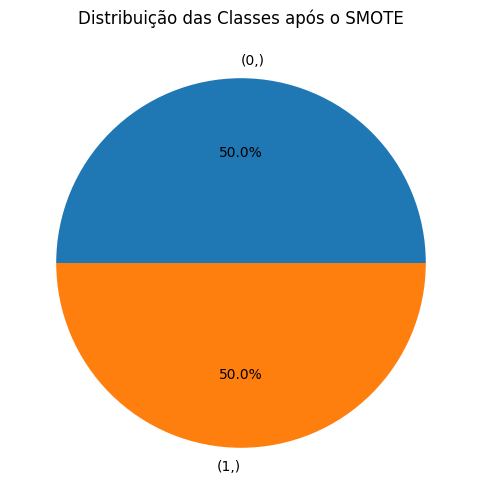

In [35]:
class_counts = y_train_resampled.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribuição das Classes após o SMOTE')
plt.show()

# Aplicando as técnicas de machine learning.

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Criar o modelo Random Forest
random_forest = RandomForestClassifier() #n_estimators=100, max_depth=5

# Treinar o modelo com os dados de treinamento balanceados
random_forest.fit(X_train_resampled, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)


<ipython-input-36-5d783bcbaa2c>:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [37]:
importance = random_forest.feature_importances_

# Exibir a importância de feature
for feature, score in zip(X.columns, importance):
    print(f'{feature}: {score}')

idade: 0.1715201341176819
IMC: 0.07544648252055969
nível de HbA1c: 0.48167442719732595
nível de glicose no sangue: 0.2713589561644324


Com base nas informações da Feature importances as variáveis idade, IMC, nível de HbA1c e nível de glicose no sangue tem uma importância significativa para o modelo de previsão.


In [38]:
# Avaliar o desempenho no conjunto de treinamento
y_train_pred = random_forest.predict(X_train_resampled)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

train_precision = precision_score(y_train_resampled, y_train_pred)

train_recall = recall_score(y_train_resampled, y_train_pred)

train_f1 = f1_score(y_train_resampled, y_train_pred)

train_confusion = confusion_matrix(y_train_resampled, y_train_pred)

# Avaliar o desempenho no conjunto de teste
y_test_pred = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)

# Imprimir as métricas de desempenho
print("Desempenho no conjunto de treinamento:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("Confusion Matrix:")
print(train_confusion)

print("\nDesempenho no conjunto de teste:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("Confusion Matrix:")
print(test_confusion)

Desempenho no conjunto de treinamento:
Accuracy: 0.9980113201774514
Precision: 0.9989709005714786
Recall: 0.9970497607028126
F1-Score: 0.9980094061030297
Confusion Matrix:
[[45712    47]
 [  135 45624]]

Desempenho no conjunto de teste:
Accuracy: 0.96108
Precision: 0.8086469175340272
Recall: 0.7114346090631604
F1-Score: 0.7569323007744193
Confusion Matrix:
[[45024   717]
 [ 1229  3030]]


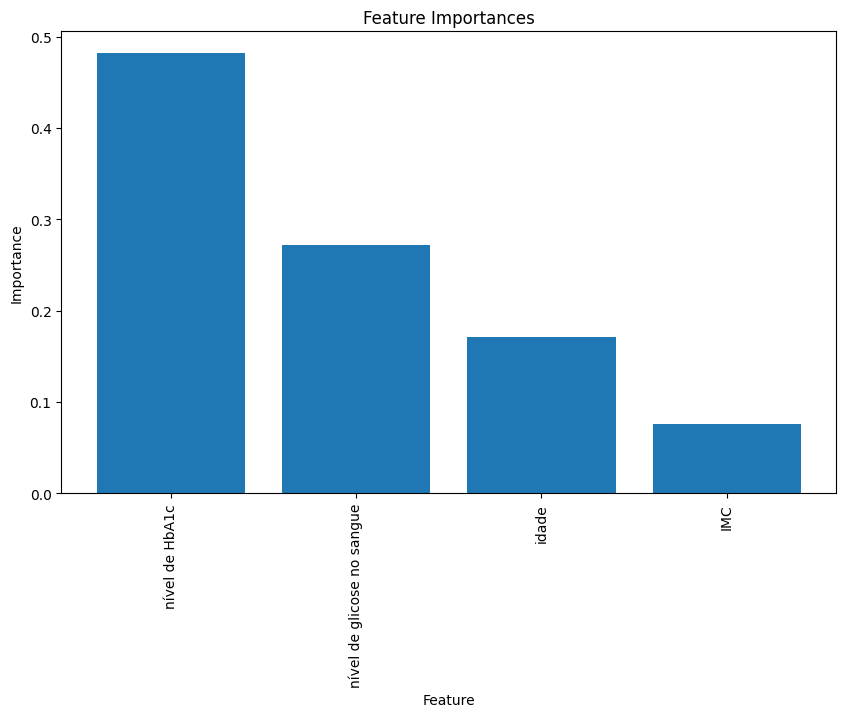

In [39]:

# Calcular as feature importances
importances = random_forest.feature_importances_

# Criar um dataframe com as importâncias e os nomes das variáveis correspondentes
feature_importances = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})

# Ordenar as importâncias em ordem decrescente
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotar um gráfico de barras das feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# X-gboost


In [40]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100)
model.fit(X_train_resampled, y_train_resampled)

y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

In [43]:
# Matriz de Confusão para o conjunto de treinamento
cm_train = confusion_matrix(y_train_resampled, y_train_pred)
print("Matriz de Confusão (Treinamento):")
print(cm_train)

# Matriz de Confusão para o conjunto de teste
cm_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusão (Teste):")
print(cm_test)

Matriz de Confusão (Treinamento):
[[45621   138]
 [ 1405 44354]]
Matriz de Confusão (Teste):
[[45451   290]
 [ 1288  2971]]


Ao analisar a matriz de confusão do conjunto de treinamento, observamos que a maioria das amostras verdadeiras está sendo classificada corretamente, tanto para a classe positiva quanto para a classe negativa. No entanto, existem alguns falsos positivos (138) e falsos negativos (1405).


Na matriz de confusão do conjunto de teste, também podemos ver um número considerável de verdadeiros negativos e verdadeiros positivos. No entanto, ainda há uma quantidade significativa de falsos positivos (290) e falsos negativos (1288).

In [41]:
from sklearn.model_selection import cross_val_score
k = 5  # Número de folds desejado

# Aplicar a validação cruzada
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=k, scoring='accuracy')

# Imprimir os resultados da validação cruzada
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")

# Calcular a média e o desvio padrão das pontuações
mean_score = scores.mean()
std_score = scores.std()

print(f"\nMédia das pontuações: {mean_score}")
print(f"Desvio padrão das pontuações: {std_score}")

Fold 1: 0.9256446678321678
Fold 2: 0.9878168706293706
Fold 3: 0.9898929195804196
Fold 4: 0.9894006447030541
Fold 5: 0.9907665410042069

Média das pontuações: 0.9767043287498437
Desvio padrão das pontuações: 0.025547832551585024


In [42]:


# Avaliação do desempenho nos conjuntos de treinamento e teste
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Desempenho no conjunto de treinamento:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

print("\nDesempenho no conjunto de teste:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

Desempenho no conjunto de treinamento:
Accuracy: 0.9831399287571844
Precision: 0.9968983187988852
Recall: 0.9692956576848271
F1-Score: 0.9829032365292353

Desempenho no conjunto de teste:
Accuracy: 0.96844
Precision: 0.9110702238577124
Recall: 0.6975815919229866
F1-Score: 0.7901595744680852
